In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('./yolov5', 'custom',
                       path='best_SH.pt', force_reload=True, source='local')

C:\Users\Jaimin\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
YOLOv5  2023-6-27 Python-3.10.9 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 


In [12]:
img = "test_images/2.jpg"

In [13]:
result = model(img)

In [78]:
result.names

{0: 'Hard-Hat', 1: 'Safety Vest'}

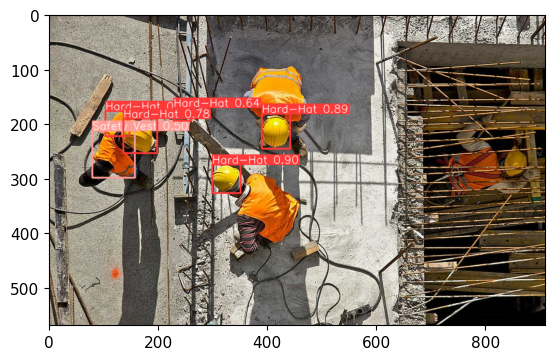

In [15]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [96]:
predictions = result.pred[0]
hard_hat_boxes = []
for box in predictions:
    pred_class = box[-1]
    if int(pred_class)==0:
        x1, y1, x2, y2 = box[:4]
        # print(x, y, w, h)
        x1 = int(x1)
        y1 = int(y1)
        x2 = int(x2)
        y2 = int(y2)
        hard_hat_boxes.append([x1,y1,x2,y2])
print(hard_hat_boxes)


[[299, 275, 351, 327], [390, 182, 442, 246], [136, 191, 198, 254], [228, 171, 261, 195], [103, 177, 147, 223]]


In [103]:
import cv2

# Window name in which image is displayed
window_name = 'Hard Hat Detection'

# Example values for start_point, end_point, color, and thickness
start_point = (x1, y1)
end_point = (x2,y2)
color = (255, 0, 0)
thickness = 2

# Load the image
image_path = "test_images/2.jpg"
image = cv2.imread(image_path)
image_orig = image.copy()
# image = cv2.resize(image, (480, 360))

#image = np.array(result)

# Check if the image was loaded successfully
if image is None:
    print('Failed to load image')
else:
    # Convert the image to the appropriate data type
    #image = image.astype(np.uint8)

    # Draw a rectangle on the image
    for hats in hard_hat_boxes:
        image_f = cv2.rectangle(image, hats[0:2], hats[2:], color, thickness)

    # Display the image
    cv2.imshow(window_name, image_f)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [124]:
import cv2
import numpy as np

for hats in hard_hat_boxes:
    x1 = hats[0]
    y1 = hats[1]
    x2 = hats[2]
    y2 = hats[3]
    # print(x1,y1,x2,y2)
    cropped_image = image_orig[y1:y2, x1:x2]
    # Display the image
    cv2.imshow("cropped_image", cropped_image)

    # Check for key press to break the loop and exit the program
    if cv2.waitKey():
        cv2.destroyAllWindows()

    img = cropped_image
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Yellow color
    yellow_lower = np.array([25, 50, 70], np.uint8)
    yellow_upper = np.array([35, 255, 255], np.uint8)

    # Grey color
    grey_lower = np.array([0, 0, 40], np.uint8)
    grey_upper = np.array([180, 18, 230], np.uint8)

    # Red color
    red_lower = np.array([136, 87, 111], np.uint8)
    red_upper = np.array([180, 255, 255], np.uint8)

    # Brown color
    brown_lower = np.array([5, 0, 0], np.uint8)
    brown_upper = np.array([17,255,255], np.uint8)

    # Blue color
    blue_lower = np.array([110,50,50], np.uint8)
    blue_upper = np.array([130,255,255], np.uint8)

    # Green color
    green_lower = np.array([50, 50, 50], np.uint8)
    green_upper = np.array([70, 255, 255], np.uint8)

    # Pink color
    pink_lower = np.array([327, 38, 58], np.uint8)
    pink_upper = np.array([335, 95, 64], np.uint8)

    # White color
    white_lower = np.array([0, 0, 200], np.uint8)
    white_upper = np.array([180, 20, 255], np.uint8)

    # All color together
    yellow = cv2.inRange(hsv, yellow_lower, yellow_upper)
    grey = cv2.inRange(hsv, grey_lower, grey_upper)
    red = cv2.inRange(hsv, red_lower, red_upper)
    brown = cv2.inRange(hsv, brown_lower, brown_upper)
    blue = cv2.inRange(hsv, blue_lower, blue_upper)
    green = cv2.inRange(hsv, green_lower, green_upper)
    pink = cv2.inRange(hsv, pink_lower, pink_upper)
    white = cv2.inRange(hsv, white_lower, white_upper)

    # Morphological Transform,Dilation

    kernel = np.ones((10, 10), "uint8")

    yellow = cv2.dilate(yellow, kernel)
    res_yellow = cv2.bitwise_and(img, img, mask=yellow)

    grey = cv2.dilate(grey, kernel)
    res_grey = cv2.bitwise_and(img, img, mask=grey)

    red = cv2.dilate(red, kernel)
    res_red = cv2.bitwise_and(img, img, mask=red)

    brown = cv2.dilate(brown, kernel)
    res_brown = cv2.bitwise_and(img, img, mask=brown)

    blue = cv2.dilate(blue, kernel)
    res_blue = cv2.bitwise_and(img, img, mask=blue)

    green = cv2.dilate(green, kernel)
    res_green = cv2.bitwise_and(img, img, mask=green)

    pink = cv2.dilate(pink, kernel)
    res_pink = cv2.bitwise_and(img, img, mask=pink)

    white = cv2.dilate(white, kernel)
    res_white = cv2.bitwise_and(img, img, mask=white)

    # print(np.any(res_yellow) > 0)
    # print(np.any(res_grey) > 0)
    # print(np.any(res_red) > 0)
    # print(np.any(res_brown) > 0)
    # print(np.any(res_blue) > 0)
    # print(np.any(res_green) > 0)
    # print(np.any(res_pink) > 0)
    # print(np.any(res_white) > 0)

    if np.any(res_yellow) > 0:
        image_c = cv2.rectangle(image_orig, start_point, end_point, color, thickness)
    elif np.any(res_grey) > 0:
        image_c = cv2.rectangle(image_orig, start_point, end_point, color, thickness)
    elif np.any(res_red) > 0:
        image_c = cv2.rectangle(image_orig, start_point, end_point, color, thickness)
    elif np.any(res_brown) > 0:
        image_c = cv2.rectangle(image_orig, start_point, end_point, color, thickness)
    elif np.any(res_blue) > 0:
        image_c = cv2.rectangle(image_orig, start_point, end_point, color, thickness)
    elif np.any(res_green) > 0:
        image_c = cv2.rectangle(image_orig, start_point, end_point, color, thickness)
    elif np.any(res_pink) > 0:
        image_c = cv2.rectangle(image_orig, start_point, end_point, color, thickness)
    elif np.any(res_white) > 0:
        image_c = cv2.rectangle(image_orig, start_point, end_point, color, thickness)
    else:
        print("Not wearing a hard hat")
        # image_s = cv2.rectangle(image, start_point_2, end_point_2, color, thickness)

# Display the image
cv2.imshow(window_name, image_orig)

# Check for key press to break the loop and exit the program
if cv2.waitKey():
    cv2.destroyAllWindows()
        # break

    # Close all windows

C:\Users\Jaimin\AppData\Local\Temp\ipykernel_3024\804062052.py:46: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 327 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  pink_lower = np.array([327, 38, 58], np.uint8)
C:\Users\Jaimin\AppData\Local\Temp\ipykernel_3024\804062052.py:47: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 335 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  pink_upper = np.array([335, 95, 64], np.uint8)


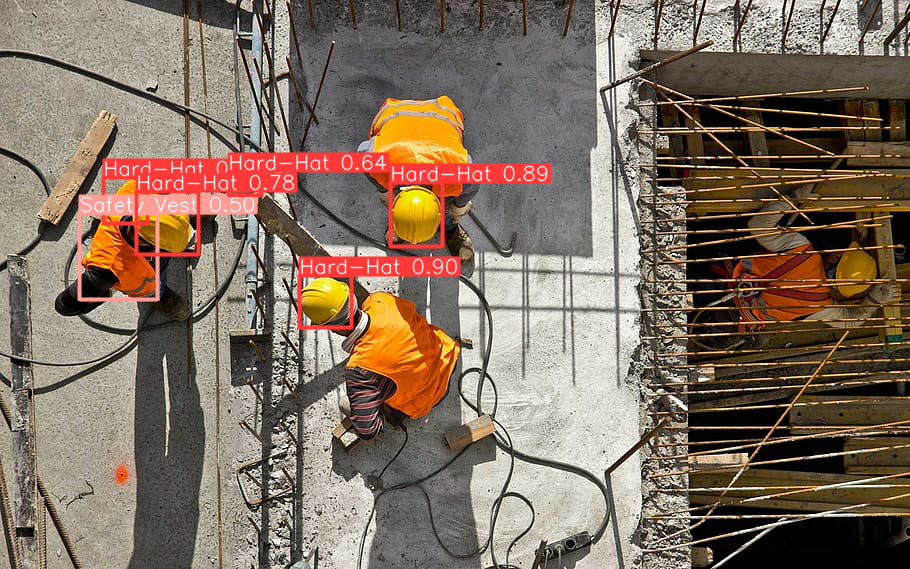

In [122]:
result.show()